# P5: Identify Fraud from Enron Email By Manish Kumar
-------------------
_____________

## 1. Understanding the Dataset and Question
___

**About Enron:-** Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as the result of a merger between Houston Natural Gas and InterNorth, both relatively small regional companies in the U.S. Before its bankruptcy on December 2, 2001.

At the end of 2001, it was revealed that its reported financial condition was sustained by institutionalized, systematic, and creatively planned accounting fraud, known since as the Enron scandal. Enron has since become a well-known example of willful corporate fraud and corruption.

**About Data Set:-** This data set contains all emails conversations between the top persons in the company those may be involved in the fraud. This dataset also contains all finacial information like salary,bonous etc.

The data set contains 146 person.

The persons in the data set can be classified into two two categories POI and Non POI.
**POI** refers to **person of interest**.
All the members which are expected to be involved in the fraud and also the members of high post are included in the POI and all other fall into Non Poi list.

The data set contains a feature named as poi which has two values 0 or 1. If the person belong to the poi list then the value of poi will be 1 otherwise 0.

So i tried to find how many POI person are there in the dataset. And for that i just counted all the 1's in the dataset poi feature.

The number of poi person are:- 18

So it means there are 18 members of poi in the dataset.

Now as there is one feature poi there are 21 features in the dataset including financial features.

The list can be found by running the python script named explore_enron_data.py

One more thing that is important in the dataset exploration is that we should know how much data we have and how much not.
So in order to find that i tried to find the number of missing values or NaN values in the features of the dataset along with the percentage showing the percentage of data in the feature.

The feature with the minimum missing value is poi and this feature has no missing value.

The feature with the maximum missing value is restricted_stock_deferred and 98% values are missing in this feature.

Bonous feature contains 43% NaN values, Salary feature contains 34.9% NaN values it means we don't have salary for 51 person out of 146, We don't have email address for 35 person in the data set of 146.

**Goal And Machine learning benefits:-** My Goal in this project is to identify correctly the person's those may have made the fraud in the company i.e poi(person of interest).And for this i have to analyse the emails between the poi and non poi and their finacial.And Machine learning can be helpful because machine can analyse the training data and on the basis of that data it will analyse it and can be used to predict the data to find the fraud. Machine learning can make the task a lot easier than doing without machine learning.
Humans can not analyse large data and can not find distinct pattern in the dataset because the dataset is very large.But machines can do this task in a better way.

**Outliers in the dataset:-** I tried to find the outliers in the dataset And the main thing i noticed is in the feature bonus and salary. When i created scatter plot between the two features i found that there is an outlier in the dataset.the 
So i tried to find the outlier and i came to know that the outlier is due to the Total value the dataset contains the total as a person among the 146 person. But Total is not a person it is the total of financial values of the features so to make the data better i have to remove the outlier so i deleted the TOTAL key from the data_dict variable which contains the data of all person in the dataset.

<img src="figure_1.png">

**After Removing Outlier**

<img src="figure_2.png">

## 2.Optimize Feature Selection/Engineering
___

**Create new features:-** I have created two new feature from the existing feature. The two new features which i created are fraction_from_poi and fraction_to_poi .

fraction_from_poi = from_poi_to_this_person/to_messages

fraction_to_poi = from_this_person_to_poi/from_messages

Although to create this feature i have to remember that there are nan values in the features so firstly check the four feature if no value is nan then the fraction value is calculated above method and if any nan value exist then the fraction is set to 0.

The reason of choosing these new feature is that these feature greatly impact the classifiers i am giving the comparision of different classfier with or without new features.

|  Classifier  	| Precision 	| Precision with new features 	|  Recall 	| Recall with new features 	|
|:------------:	|:---------:	|:---------------------------:	|:-------:	|:------------------------:	|
|  GaussianNB  	|  0.48876  	|           0.49545           	| 0.38050 	|          0.32650         	|
| DecisionTree 	|  0.24519  	|           0.33953           	| 0.21650 	|          0.36500        	|
|      KNN     	|  0.58653  	|           0.67845           	| 0.25250 	|          0.38400         	|

So from the table it is clear that new features helps a lot for increasing the precision and recall for almost every classifer.
So i choose to include the new feature in my feature list.

**Intelligently select features** Now after adding the two new feature i have total 23 features which contains both financial feature as well as email related features.

So i have to select the some important features it means  which has more effect on the poi. So in order to select the features i used univariate selection method. There are mostly two method used one is selectpercentile and other is SelectKBest .

As the name suggest the select percentile method select the specified percentage of features from the total features and in the selectkbest method we specify k number of feature to select from the total features on the basis of the their importance.

i specified k=5 in the code which means it will select 5 features from all the features.

| Rank 	|         Feature         	|  score 	|
|:----:	|:-----------------------:	|:-------:	|
|   1  	| exercised_stock_options 	|  25.097 	|
|   2  	|    total_stock_value    	|  24.467 	|
|   3  	|          bonus          	|  21.060 	|
|   4  	|          salary         	|  18.575 	|
|   5  	|     fraction_to_poi     	|  16.641 	|

So these are the feature with the highest scores.

The reason for the slection of only five feature can be seen in the below graph of feature v/s k_score that after 5th feature the value decrease sharply so it is the cutoff point so i choose 5 features.


**Properly scale features:-** Feature scaling mean the scaling of the feature in simple words it change the feature values by dividing the maximum-minimal value of the feature. And by this the feature gets scaled.
In some algorithms scaling is very important and in some algotithms scaling has no effect my final classifier is KNN and it has no effect of scaling so i have not deployed scaling feature. 

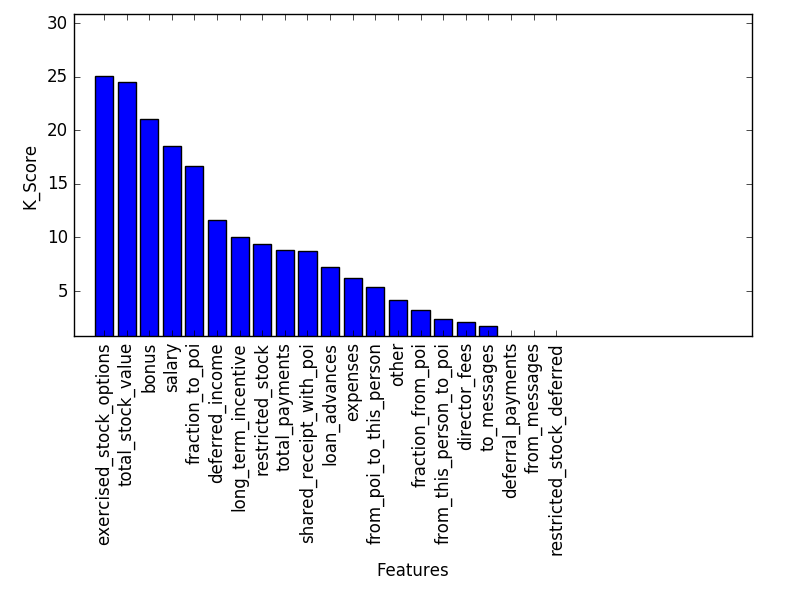

In [3]:
from IPython.display import Image
Image("./Feature vs kscore.png")

## 3.Pick and Tune an Algorithm
___

**Pick an algorithm** In this project i used three classifier algorithms and these three are:-
1. GausianNB
2. DecisionTree
3. KNeighbour Algorithm

The values of accuracy_Score , Precision ,Recall score for these three algorithm i got are:-

    GausianNB
    Accuracy Score  0.85629
    Precision Score 0.49545
    Recall Score    0.32650

    DecisionTree
    Accuracy Score  0.80857
    Percision Score 0.34038
    Recall Score    0.36250

    KNN
    Accuracy Score  0.88600
    Precision Score 0.67845
    Recall Score    0.38400
On the basis of these values i choose KNeighbour Classifier.Because it has the highest precision and recall score 

**Discuss parameter tuning and its importance:-** Parameter tuning is the process of selecting the best values of the parameter so that the we get high score from that algorithm.

Parameter tunning is very important because it can increase the quality of the algorithm if proper parameter are used we can get most out of the algorithm.

**Tune the algorithm:-** I have choosen KNN classifier and it has many parameters two most important parameters are weights and n_neighbors.
weights can have two values uniform and distance I used both values and the better parameter was distance so i used weights as distance. The other parameter is n_neighbour i used gridsearchcv to find the best value and the best value i got is 5.

I used parameter tunning in the DecisionTree classifier also.It also has two main parameters one is criteria and other is random_state. First parameter criteria can have two values 'gini' and 'entropy' and i used GridSearchCV to find the better one from the two. The second parameter is random_state and i set its value to be 42 it is the random value and assigning some value to this parameter make the precision and recall score constant corresponding to that value.

So there are many more parameters and we have to find the appropriate one from those many parameters.

## 4.Validate and Evaluate
___

**Usage of Evaluation Metrics:-** I used three Evaluation Metrics:
1. Accuracy_Score
2. Precision Score
3. Recall Score

The accuracy score represent the percentage of correct predicted values.It means how many values are correctly identified and on the test_features it can be done by comparing the predicted lable with the true lables.

Precision score is the score which represent how precise the algorithm is in order to find the correct value. In this project it means that if the algorithms correctly identify the poi in the dataset.The lower the score means that it does not correctly identify the poi, the higher the precision means there is more chances that the predicted poi is really a poi and lower precision means that the poi may not really be a poi.

Recall value is the score which tells how many times if a person is truely a poi but not identified as poi by algorithm if the recall value is low it means that the true poi is going to missed the identification and higher the value of recall score means that the poi will be identifed correctly if he is truely a poi.

**Discuss validation and its importance:-** Validation is a process which helps to identify that whether the algorithm is valid or not it means it helps to identify the algorithm's ability to predict values.

It gives us an idea that how well the algorithm is going to perform on the real data apart from the training data.
And to do the validation the classifier is firstly trained on the data and then some more data is given to predict and then it is compared with the solution of data and then its validity is identified that how well it can predict the values.

It is very important because if we don't perform validation process on a algorithm then we can not say which algorithm is good or which is not. And without validation process it becomes really hard to work with that algorithm in the real world because there is always an uncertainity about the algorithm wheather the algorithm has the capacity to predict the data correctly or not.

Validation also helps to decrease the overfitting the model. because in validation process some of the data from the original data is removed and that removed data is not be used for training the classifier and it reduces the overfitting.

**Validation Strategy:-** Validation strategy includes train_test_split in this the complete data is split into two set one is training data and the other is testing data.

Training data contains two things one is training features and the other is training labels. Trainig feature are the values which are given and the training labels are the correct values coresponding to the features.The classifer is trained on the training feature and training labels.

Testing data is some part of the original dataset it is generally 10-30% of the original data.
It also contains test features and test labels and once the classifier is trained on the training data then it is ready to give predict the values so test feature are given to predict the labels. Then these predicted labels are then compared with the true label and by comparing these two we find the percentage that tells how well the algorithm is performing.

**Why choose stratified shuffle split in this problem over other splitting techniques available?**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

And in this dataset the target class is poi and there are very less people with poi value 1 other have value 0 so it makes sense to use StratifiedShuffleSplit to ensure relative class frequencies.

**Algorithm Performance:-** After running the tester.py i got the following values:
        
        Accuracy:  0.88600      
        Precision: 0.67845    >.3 
        Recall:    0.38400    >.3  
        F1:        0.49042